# Workshop 8

# Data Project!

# Repository structure
- clean your folders
- write a README.md
- .py files for functions

# Example

# The good dataproject
- Remember the structure
- Creative use of data
- Tell a story!



<img src="lego_pic.png" style="float:center">

# Can you see a data set without trying to regress stuff?!
## I have made an example

In [1]:
import numpy as np 
from numpy import linalg as la
import requests
import pandas as pd
import io



In [2]:
def estimate( 
        y: np.array, x: np.array, t: int=None, robust_se = True
    ) -> list:
    """Uses the provided estimator to perform a regression of y on x, 
    and provides all other necessary statistics such as standard errors, 
    t-values etc.  

    Args:
        >> y (np.array): Dependent variable (Needs to have shape 2D shape)
        >> x (np.array): Independent variable (Needs to have shape 2D shape)
        >> t (int, optional): If panel data, t is the number of time periods in
        the panel, and is used for estimating the variance. Defaults to None.

    Returns:
        list: Returns a dictionary with the following variables:
        'b_hat', 'se', 'sigma2', 't_values', 'R2', 'cov'
    """
    
    b_hat = la.inv(x.T@x)@(x.T@y)  # Estimated coefficients
    
    residual = y - x@b_hat  # Calculated residuals
    
    SSR = residual.T@residual  # Sum of squared residuals
    
    SST = (y - np.mean(y)).T@(y - np.mean(y))  # Total sum of squares
    
    R2 = 1 - SSR/SST # R squared

    k = x.shape[1] # cols
    n = x.shape[0] # rows

    # Calculate sigma2
    sigma2 = (np.array(SSR/(n - k)))

   
    if robust_se:
        # If only cross sectinoal, we can easiily use the diagonal.
        if not t:
            uhat2 = residual * residual # Uhat squared
            diag = np.diag(uhat2.reshape(-1, )) # reshape u hat squared
            cov = la.inv(x.T@x) @ (x.T@diag@x) @ la.inv(x.T@x) # calculate covariance
    
        # Else we loop over each individual.
        else:
            n = int(residual.size / t)  # res size over time periods 
            k = x.shape[1] # cols
            diag = np.zeros((k, k)) # init diagonal calc
            for i in range(0, n*t, t):
                slice_obj = slice(i, i + t) # slicing i to i + time 
                uhat2 = residual[slice_obj]@residual[slice_obj].T # calculation u hat squared
                diag += x[slice_obj].T @ uhat2 @ x[slice_obj] #adding to diagonal
            cov = la.inv(x.T@x)@(diag)@la.inv(x.T@x) # covariance

        se = np.sqrt(np.diag(cov)).reshape(-1, 1) # standard error
    else:
        cov = sigma2*la.inv(x.T@x) # covariance
        se = np.sqrt(cov.diagonal()).reshape(-1, 1) # standard errors
        
    
    t_values = b_hat/se # t-vals
    
    names = ['b_hat', 'se', 'sigma2', 't_values', 'R2', 'cov'] 
    results = [b_hat, se, sigma2, t_values, R2, cov]
    return dict(zip(names, results)) 


In [3]:
#found some data
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'
# get it 
urlData = requests.get(url).content
#in a df from a string in csv format
df = pd.read_csv(io.StringIO(urlData.decode('utf-8')))
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


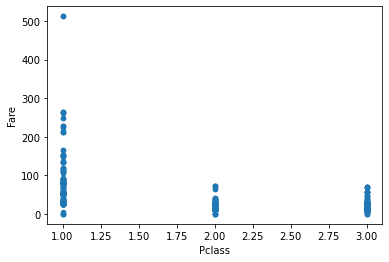

In [4]:
df.plot.scatter(x = 'Pclass', y = 'Fare');



In [5]:
vars = ['Fare','Pclass','Survived', 'Age', 'Parch']
df = df[vars]  #subseting df
df = df.apply(pd.to_numeric) # All values to numeric
df = df.dropna(axis=0,inplace=False) # dropping nans (important)



In [6]:
y = df.Fare.to_numpy() # fare = ticket price
x = df[vars[1:]].to_numpy() # x vals



In [7]:
reg = estimate(y, x, robust_se = False) #Reeeeeeg y x




In [8]:
reg



{'b_hat': array([-8.88085677, 30.18132656,  1.03128368, 17.17280061]),
 'se': array([[1.26924275],
        [3.4503437 ],
        [0.09149365],
        [2.11559968]]),
 'sigma2': array(2294.15065511),
 't_values': array([[-6.99697261e+00,  2.37790025e+01,  8.12518865e-01,
          1.35299576e+01],
        [-2.57390496e+00,  8.74733916e+00,  2.98893029e-01,
          4.97712753e+00],
        [-9.70652840e+01,  3.29873469e+02,  1.12716426e+01,
          1.87693914e+02],
        [-4.19779642e+00,  1.42660858e+01,  4.87466361e-01,
          8.11722593e+00]]),
 'R2': 0.18422826705370599,
 'cov': array([[ 1.61097717e+00, -3.44859947e-01, -8.06996426e-02,
         -7.28279642e-01],
        [-3.44859947e-01,  1.19048716e+01, -9.28623882e-02,
         -1.35754892e+00],
        [-8.06996426e-02, -9.28623882e-02,  8.37108734e-03,
          1.26955755e-02],
        [-7.28279642e-01, -1.35754892e+00,  1.26955755e-02,
          4.47576203e+00]])}